# Task 2-Outlier Detection and Data Correction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
spectacles_data = pd.read_csv('Dots Potential Customer Survey Data - Sheet1.csv')
spectacles_data.head()

,Unique ID,Country,Age,Annual Family Income ($),Gender,Time spent watching videos/TV,Time spent playing indoor sports,Time spent playing outdoor sports,Total Time spent working in front of screen,Sleeping hours,...,Has OTT subscription,Number of friends,Likes spicy food,Likes desserts,Wants to change career,Has debt,Has kids,Drinks alcohol,Smoker,Wear Specs
0,7319483,CAN,13,20423,Male,3,4,3,7,8,...,1,4,0,1,0,0,0,0,0,1
1,4791965,CAN,13,5570,Female,3,3,1,10,3,...,1,6,0,1,0,0,0,0,1,1
2,2991718,CAN,13,58706,Female,2,2,1,4,9,...,0,5,0,0,0,0,0,0,0,0
3,4220106,CAN,13,57118,Male,6,2,4,10,11,...,1,9,0,1,0,0,0,0,0,0
4,2263008,CAN,14,59834,Male,6,3,4,13,12,...,1,6,1,0,0,0,0,0,0,0


In [3]:
spectacles_data.shape

(3220, 29)

In [4]:
spectacles_data.columns

Index(['Unique ID', 'Country', 'Age', 'Annual Family Income ($)', 'Gender',
       'Time spent watching videos/TV', 'Time spent playing indoor sports',
       'Time spent playing outdoor sports',
       'Total Time spent working in front of screen', 'Sleeping hours', 'IQ',
       'Whether parents have specs', 'English speaker',
       'Migrated within country', 'Migrated overseas',
       'Maritial Status (0 - Single, 1 - Married, 2 - Divorced)',
       'Has Diabetes', 'Education Status', 'Has Gym Subscription',
       'Has OTT subscription', 'Number of friends', 'Likes spicy food',
       'Likes desserts', 'Wants to change career', 'Has debt', 'Has kids',
       'Drinks alcohol', 'Smoker', 'Wear Specs'],
      dtype='object')

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
spectacles_data.describe()

,Unique ID,Age,Annual Family Income ($),Time spent watching videos/TV,Time spent playing indoor sports,Time spent playing outdoor sports,Total Time spent working in front of screen,Sleeping hours,IQ,Whether parents have specs,...,Has OTT subscription,Number of friends,Likes spicy food,Likes desserts,Wants to change career,Has debt,Has kids,Drinks alcohol,Smoker,Wear Specs
count,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,4.988139e+06,44.834161,20578.639130,4.347205,1.991925,1.700621,8.162733,7.648447,106.011801,0.334783,...,0.706211,4.450932,0.607764,0.584783,0.247826,0.450932,0.568944,0.606522,0.310870,0.548137
std,2.867911e+06,19.073161,15079.429422,2.807803,1.205222,1.190910,2.759419,2.260047,15.414674,0.471988,...,0.455567,2.454004,0.488325,0.492836,0.431817,0.497664,0.495301,0.488597,0.462921,0.497755
min,1.683000e+03,13.000000,10.000000,0.000000,0.000000,-2.000000,-2.000000,-1.000000,54.000000,0.000000,...,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.516499e+06,29.000000,8494.000000,2.000000,1.000000,1.000000,6.000000,6.000000,95.000000,0.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.041256e+06,44.000000,16982.000000,4.000000,2.000000,2.000000,8.000000,8.000000,106.000000,0.000000,...,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,7.459871e+06,60.000000,30965.250000,6.000000,3.000000,3.000000,10.000000,9.000000,116.000000,1.000000,...,1.000000,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.999011e+06,91.000000,59858.000000,10.000000,4.000000,5.000000,18.000000,17.000000,161.000000,1.000000,...,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


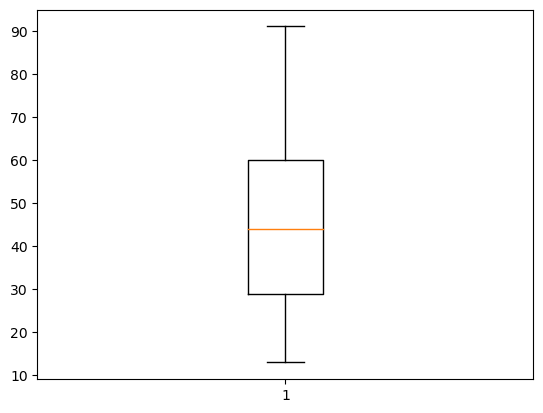

In [7]:
plt.boxplot(spectacles_data["Age"])
plt.show()

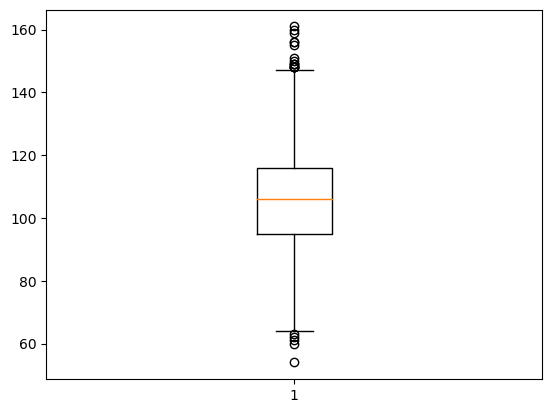

In [8]:
plt.boxplot(spectacles_data["IQ"])
plt.show()

In [42]:
print(spectacles_data['IQ'].quantile(0.25)) 
print(spectacles_data['IQ'].quantile(0.75)) 
spectacles_data['IQ'] = np.where(spectacles_data['IQ'] > 130, 80, spectacles_data['IQ'])
spectacles_data.describe()

90.0
112.0


,Unique ID,Age,Annual Family Income ($),Time spent watching videos/TV,Time spent playing indoor sports,Time spent playing outdoor sports,Total Time spent working in front of screen,Sleeping hours,IQ,Whether parents have specs,...,Has OTT subscription,Number of friends,Likes spicy food,Likes desserts,Wants to change career,Has debt,Has kids,Drinks alcohol,Smoker,Wear Specs
count,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.0,3112.000000,3112.000000,...,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000
mean,4.976012e+06,45.138496,20358.923522,4.375643,1.983933,1.687339,6.774422,5.0,100.051414,0.336118,...,0.705656,4.469152,0.617931,0.580656,0.246787,0.447622,0.562018,0.606041,0.307519,0.540810
std,2.865409e+06,19.206212,14951.688788,2.819200,1.204192,1.187200,2.064349,0.0,15.006757,0.472456,...,0.455821,2.448902,0.485971,0.493531,0.431211,0.497329,0.496219,0.488704,0.461540,0.498412
min,1.683000e+03,13.000000,10.000000,0.000000,0.000000,-2.000000,-2.000000,5.0,54.000000,0.000000,...,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.510280e+06,29.000000,8364.750000,2.000000,1.000000,1.000000,5.000000,5.0,90.000000,0.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.022098e+06,45.000000,16813.000000,4.000000,2.000000,2.000000,7.000000,5.0,102.000000,0.000000,...,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,7.424861e+06,60.000000,30615.250000,6.000000,3.000000,3.000000,9.000000,5.0,112.000000,1.000000,...,1.000000,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.999011e+06,91.000000,59858.000000,10.000000,4.000000,5.000000,10.000000,5.0,125.000000,1.000000,...,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


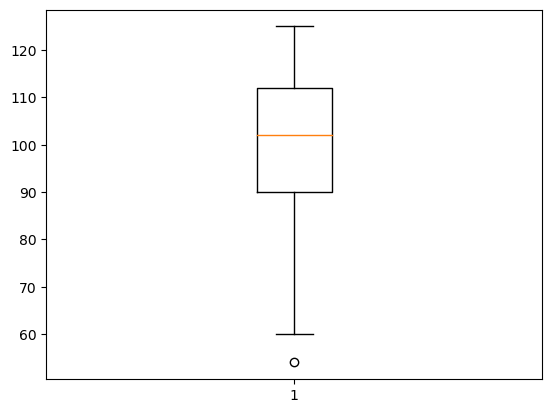

In [43]:
plt.boxplot(spectacles_data["IQ"])
plt.show()

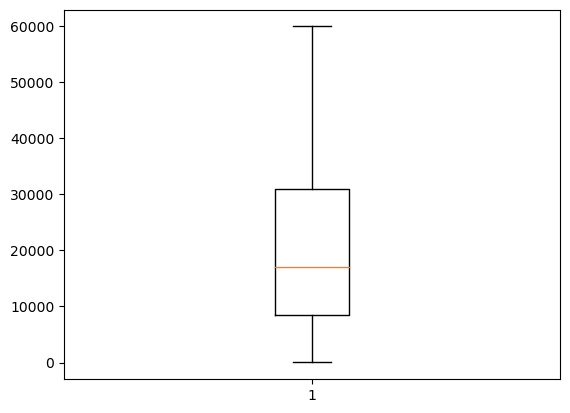

In [11]:
plt.boxplot(spectacles_data["Annual Family Income ($)"])
plt.show()

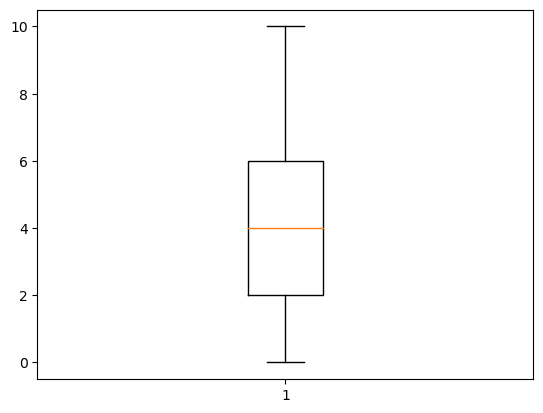

In [12]:
plt.boxplot(spectacles_data["Time spent watching videos/TV"])
plt.show()

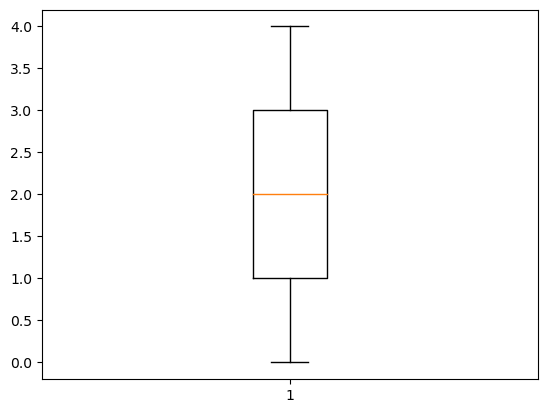

In [13]:
plt.boxplot(spectacles_data["Time spent playing indoor sports"])
plt.show()

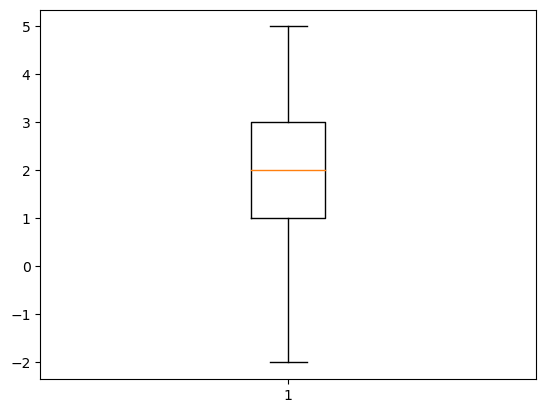

In [14]:
plt.boxplot(spectacles_data["Time spent playing outdoor sports"])
plt.show()

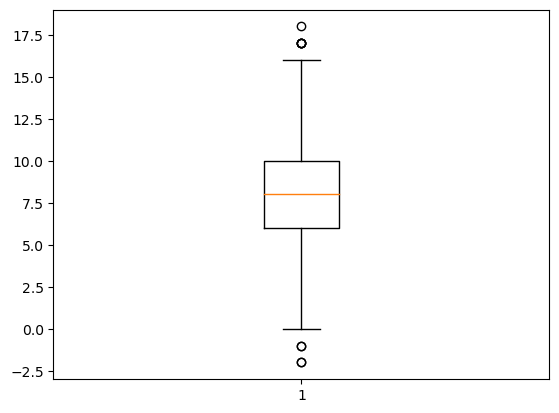

In [15]:
plt.boxplot(spectacles_data["Total Time spent working in front of screen"])
plt.show()

In [40]:
print(spectacles_data['Total Time spent working in front of screen'].quantile(0.25)) 
print(spectacles_data['Total Time spent working in front of screen'].quantile(0.75)) 
spectacles_data['Total Time spent working in front of screen'] = np.where(spectacles_data['Total Time spent working in front of screen'] > 15, 2, spectacles_data['Total Time spent working in front of screen'])
spectacles_data.describe()

5.0
9.0


,Unique ID,Age,Annual Family Income ($),Time spent watching videos/TV,Time spent playing indoor sports,Time spent playing outdoor sports,Total Time spent working in front of screen,Sleeping hours,IQ,Whether parents have specs,...,Has OTT subscription,Number of friends,Likes spicy food,Likes desserts,Wants to change career,Has debt,Has kids,Drinks alcohol,Smoker,Wear Specs
count,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.0,3112.000000,3112.000000,...,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000
mean,4.976012e+06,45.138496,20358.923522,4.375643,1.983933,1.687339,6.774422,5.0,100.051414,0.336118,...,0.705656,4.469152,0.617931,0.580656,0.246787,0.447622,0.562018,0.606041,0.307519,0.540810
std,2.865409e+06,19.206212,14951.688788,2.819200,1.204192,1.187200,2.064349,0.0,15.006757,0.472456,...,0.455821,2.448902,0.485971,0.493531,0.431211,0.497329,0.496219,0.488704,0.461540,0.498412
min,1.683000e+03,13.000000,10.000000,0.000000,0.000000,-2.000000,-2.000000,5.0,54.000000,0.000000,...,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.510280e+06,29.000000,8364.750000,2.000000,1.000000,1.000000,5.000000,5.0,90.000000,0.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.022098e+06,45.000000,16813.000000,4.000000,2.000000,2.000000,7.000000,5.0,102.000000,0.000000,...,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,7.424861e+06,60.000000,30615.250000,6.000000,3.000000,3.000000,9.000000,5.0,112.000000,1.000000,...,1.000000,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.999011e+06,91.000000,59858.000000,10.000000,4.000000,5.000000,10.000000,5.0,125.000000,1.000000,...,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


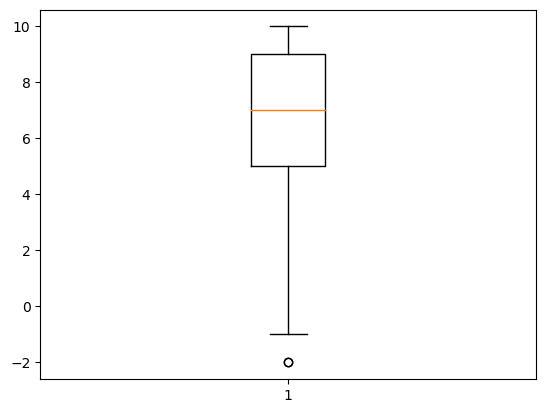

In [41]:
plt.boxplot(spectacles_data["Total Time spent working in front of screen"])
plt.show()

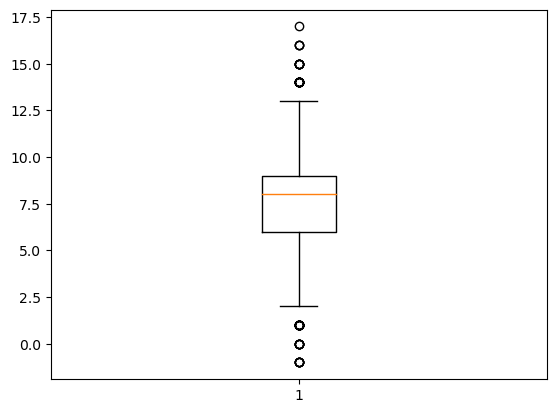

In [18]:
plt.boxplot(spectacles_data["Sleeping hours"])
plt.show()

In [32]:
print(spectacles_data['Sleeping hours'].quantile(0.25)) 
print(spectacles_data['Sleeping hours'].quantile(0.75)) 
spectacles_data['Sleeping hours'] = np.where(spectacles_data['IQ'] > 10, 5, spectacles_data['Sleeping hours'])
spectacles_data.describe()

6.0
9.0


,Unique ID,Age,Annual Family Income ($),Time spent watching videos/TV,Time spent playing indoor sports,Time spent playing outdoor sports,Total Time spent working in front of screen,Sleeping hours,IQ,Whether parents have specs,...,Has OTT subscription,Number of friends,Likes spicy food,Likes desserts,Wants to change career,Has debt,Has kids,Drinks alcohol,Smoker,Wear Specs
count,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.0,3112.000000,3112.000000,...,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000
mean,4.976012e+06,45.138496,20358.923522,4.375643,1.983933,1.687339,8.077121,5.0,100.051414,0.336118,...,0.705656,4.469152,0.617931,0.580656,0.246787,0.447622,0.562018,0.606041,0.307519,0.540810
std,2.865409e+06,19.206212,14951.688788,2.819200,1.204192,1.187200,2.683059,0.0,15.006757,0.472456,...,0.455821,2.448902,0.485971,0.493531,0.431211,0.497329,0.496219,0.488704,0.461540,0.498412
min,1.683000e+03,13.000000,10.000000,0.000000,0.000000,-2.000000,-2.000000,5.0,54.000000,0.000000,...,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.510280e+06,29.000000,8364.750000,2.000000,1.000000,1.000000,6.000000,5.0,90.000000,0.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.022098e+06,45.000000,16813.000000,4.000000,2.000000,2.000000,8.000000,5.0,102.000000,0.000000,...,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,7.424861e+06,60.000000,30615.250000,6.000000,3.000000,3.000000,10.000000,5.0,112.000000,1.000000,...,1.000000,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.999011e+06,91.000000,59858.000000,10.000000,4.000000,5.000000,15.000000,5.0,125.000000,1.000000,...,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


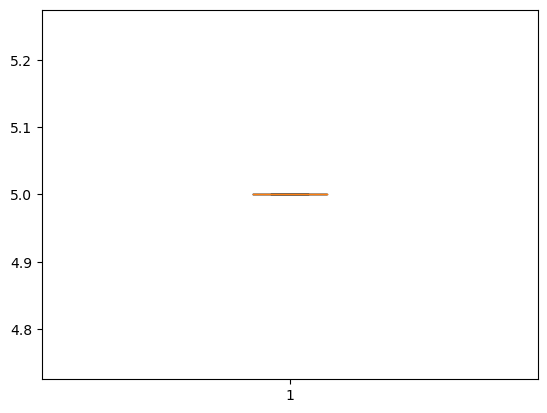

In [33]:
plt.boxplot(spectacles_data["Sleeping hours"])
plt.show()

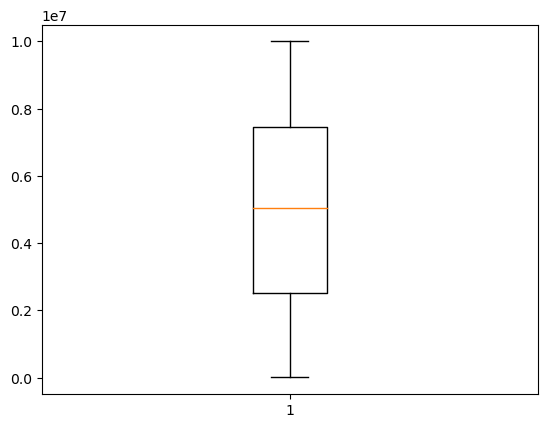

In [19]:
plt.boxplot(spectacles_data["Unique ID"])
plt.show()

In [20]:
import os
import re
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [21]:
percentiles = spectacles_data[['Age','IQ','Sleeping hours','Annual Family Income ($)','Time spent watching videos/TV','Time spent playing indoor sports','Time spent playing outdoor sports','Total Time spent working in front of screen']]

In [22]:
#10, 25, 50, 70, 90, 95, 99 percentiles

print("10th percentile : ",
       np.percentile(percentiles, 10))
print("25th percentile : ",
       np.percentile(percentiles, 25))
print("50th percentile : ", 
       np.percentile(percentiles, 50))
print("70th percentile : ",
       np.percentile(percentiles, 70))
print("90th percentile : ",
       np.percentile(percentiles, 90))
print("95th percentile : ",
       np.percentile(percentiles, 95))
print("99th percentile  : ",
       np.percentile(percentiles, 99))

10th percentile :  1.0
25th percentile :  3.0
50th percentile :  8.0
70th percentile :  50.0
90th percentile :  6702.500000000033
95th percentile :  20973.549999999992
99th percentile  :  45781.89


<Axes: >

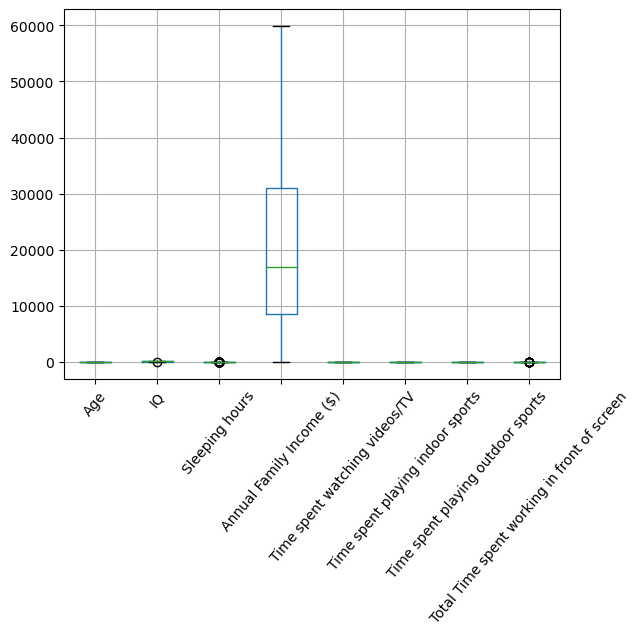

In [23]:
## Finding out remining outliers with boxplots 
percentiles.boxplot(rot = 50)

In [24]:
## Removing outliers from Sleeping hours
Sleeping_hours_Out1 = spectacles_data[(spectacles_data['Sleeping hours'] < 3.5) ].index
spectacles_data.drop(Sleeping_hours_Out1 , inplace = True)

In [25]:
spectacles_data.shape

(3112, 29)